# DATATON BC

In [44]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

Below I will code pca. Based on: https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60

In [37]:
data_file = 'sample_train_1000.csv'
header_file = 'header.txt'
folder_path = './../Data/'
# loading database
df = pd.read_csv(folder_path + data_file, header=None)
# renaming df cols
header_cols = pd.read_csv(folder_path + header_file, header = None)
df.columns = ( header_cols.iloc[0] )
df.describe()

,periodo,id_cli,fecha_nacimiento,edad,ult_actual,codigo_ciiu,cupo_total_tc,cuota_tc_bancolombia,nro_tot_cuentas,ctas_activas,...,cuota_tarjeta_de_credito,cuota_de_sector_solidario,cuota_sector_real_comercio,cupo_tc_mdo,saldo_prom3_tdc_mdo,cuota_tc_mdo,saldo_no_rot_mdo,cuota_libranza_sf,ind,gasto_familiar
count,1000.000000,1.000000e+03,1.000000e+03,1000.000000,1.000000e+03,1000.0000,1.000000e+03,1.000000e+03,1000.000000,1000.000000,...,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,201959.061000,3.012645e+06,1.981700e+07,37.859973,2.019078e+07,1301.2430,2.311350e+06,1.141902e+05,0.991000,0.974000,...,2.387310e+05,6.140700e+04,1.003490e+05,5.427390e+06,1.091321e+06,3.086220e+05,1.895822e+07,4.669300e+04,1.805625e+06,8.042537e+05
std,49.735409,1.800922e+06,1.119268e+05,11.200799,7.216255e+03,2974.2564,7.358864e+06,3.230571e+05,0.284605,0.255713,...,5.809304e+05,2.475649e+05,2.936400e+05,1.655719e+07,2.753332e+06,1.103543e+06,3.907721e+07,1.817788e+05,4.531256e+06,1.307910e+06
min,201902.000000,3.082020e+05,1.946102e+07,21.234771,2.017121e+07,0.0000,0.000000e+00,0.000000e+00,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.094000e+07,0.000000e+00
25%,201907.000000,1.259814e+06,1.977090e+07,30.563313,2.019013e+07,10.0000,0.000000e+00,0.000000e+00,1.000000,1.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.777349e+05,1.709602e+05
50%,202001.000000,2.897375e+06,1.984063e+07,35.471595,2.019072e+07,10.0000,0.000000e+00,0.000000e+00,1.000000,1.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.830000e+05,0.000000e+00,9.491100e+05,4.016030e+05
75%,202007.000000,3.898286e+06,1.989072e+07,41.958248,2.020011e+07,10.0000,3.000000e+05,1.560000e+04,1.000000,1.000000,...,2.527500e+05,0.000000e+00,2.825000e+04,3.100000e+06,6.213750e+05,1.000000e+05,2.228900e+07,0.000000e+00,2.195040e+06,8.788170e+05
max,202011.000000,8.584182e+06,1.997102e+07,74.004107,2.020101e+07,9609.0000,6.300000e+07,3.216818e+06,2.000000,2.000000,...,4.244000e+06,2.135000e+06,3.230000e+06,1.490950e+08,1.763500e+07,8.409000e+06,3.306970e+08,1.209000e+06,3.431662e+07,1.399790e+07


In [38]:
# removing nan values
df2 = df.fillna(0)
df2 = df2.replace("\\N", 0)

In [39]:
#removing input data and target variable
df_target = df.loc[:,'gasto_familiar']
df = df.iloc[:,:-1]

**NOTE**: in the below cell, the categorical columns identified with num should be removed

In [41]:
# select only numeric variables and removing the target
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df2 = df2.select_dtypes(include=numerics)
df2.loc[:,'cupo_total_tc':'ind']

,cupo_total_tc,cuota_tc_bancolombia,nro_tot_cuentas,ctas_activas,ctas_embargadas,tiene_ctas_embargadas,pension_fopep,tiene_cred_hipo_2,mediana_nom3,mediana_pen3,...,cuota_rotativos,cuota_tarjeta_de_credito,cuota_de_sector_solidario,cuota_sector_real_comercio,cupo_tc_mdo,saldo_prom3_tdc_mdo,cuota_tc_mdo,saldo_no_rot_mdo,cuota_libranza_sf,ind
0,0,0.0000,1,1,0,0,0,0,1255032.0,0,...,0,0,0,0,0,0.0,0,903000,0,311715.5000
1,0,0.0000,1,1,0,0,0,0,1255032.0,0,...,0,0,0,0,0,0.0,0,903000,0,311715.5000
2,0,0.0000,1,1,0,0,0,0,1255032.0,0,...,0,0,0,0,0,0.0,0,903000,0,311306.0000
3,0,0.0000,1,1,0,0,0,0,1282673.0,0,...,0,0,0,0,0,0.0,0,2433000,0,311306.0000
4,0,0.0000,1,1,0,0,0,0,1255032.0,0,...,0,0,0,0,0,0.0,0,0,0,677516.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3000000,819847.0800,1,1,0,0,0,0,0.0,0,...,0,0,0,0,0,0.0,0,0,0,404152.9200
996,3000000,174000.0000,1,1,0,0,0,0,0.0,0,...,0,0,0,0,0,0.0,0,0,0,549516.0000
997,3000000,786231.2385,1,1,0,0,0,0,0.0,0,...,0,0,0,0,0,0.0,0,0,0,91457.7615
998,3000000,701879.9355,1,1,0,0,0,0,0.0,0,...,0,0,0,0,0,0.0,0,0,0,79785.5645


In [54]:
# Standardizing the features: mean = 0 and variance = 1
# data_num = df2.loc[:, features_num].values
data_num = df2.values
data_num = StandardScaler().fit_transform(data_num)

# apply pca
variance_to_retain = 0.99 # range value [0.0, 1.0)
pca_obj = PCA(variance_to_retain)
df_pca = pca_obj.fit_transform(data_num)
df_pca.shape

(1000, 21)

In [55]:
# Explained Variance
pca_obj.explained_variance_ratio_

array([0.1421588 , 0.10721649, 0.09734433, 0.08460492, 0.07679028,
       0.06757742, 0.06047299, 0.05473578, 0.0459023 , 0.04316351,
       0.03474272, 0.03275745, 0.02645607, 0.02234111, 0.01885148,
       0.01842925, 0.01645261, 0.01358532, 0.01122883, 0.0082501 ,
       0.0072796 ])

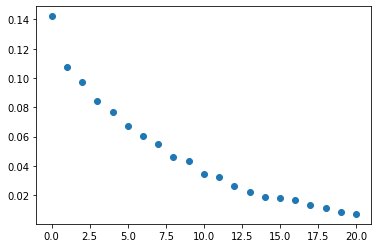

In [56]:
plt.plot(pca_obj.explained_variance_ratio_, 'o')